## 1. Describa el conjunto de datos seleccionado: fuente, dominio, tamaño, tipo de variables y problema a resolver.

---

### Fuente del Dataset

* **Origen:** Plataforma **Kaggle**
* **Título:** **Telco Customer Churn**
* **Enlace:** [https://www.kaggle.com/datasets/blastchar/telco-customer-churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
* **Publicación:** Dataset publicado por la comunidad y utilizado ampliamente en investigaciones y cursos de **Machine Learning**.

---

### Dominio y Contexto

El dataset pertenece al dominio de **telecomunicaciones** y se centra en el fenómeno del **churn o abandono del cliente**. Contiene información demográfica, contractual y de uso del servicio de clientes de una compañía de telecomunicaciones.

---

### Tamaño del Dataset

* **Total de Observaciones:** **7,043** clientes
* **Total de Variables:** **21** columnas
    * 20 variables **predictoras**
    * 1 variable **objetivo**


**Tipo de Variables**

El dataset contiene una combinación diversa de tipos de variables, lo cual lo hace adecuado para aplicar técnicas de preprocesamiento, ingeniería de características y modelado.

**Variables Predictoras (20)**

Incluyen datos:

**1\. Demográficos**

-   gender (categórica: Male/Female)
-   SeniorCitizen (numérica binaria: 0/1)
-   Partner (categórica)
-   Dependents (categórica)

**2\. Información de servicios contratados**

-   PhoneService (categórica)
-   MultipleLines (categórica)
-   InternetService (categórica)
-   OnlineSecurity (categórica)
-   OnlineBackup (categórica)
-   DeviceProtection (categórica)
-   TechSupport (categórica)
-   StreamingTV (categórica)
-   StreamingMovies (categórica)

**3\. Información de contrato y facturación**

-   Contract (categórica: Month-to-month, One year, Two year)
-   PaperlessBilling (categórica)
-   PaymentMethod (categórica)

**4\. Variables numéricas relacionadas con pagos y antigüedad**

-   tenure (numérica: meses con el servicio)
-   MonthlyCharges (numérica)
-   TotalCharges (numérica --- convertida desde texto)

* * * * *

**Variable Objetivo (1)**

-   **Churn** (binaria):

-   *Yes* = el cliente canceló el servicio
-   *No* = el cliente se mantiene activo

---
Es un problema de **clasificación binaria**, adecuado para algoritmos supervisados como Regresión Logística, Árboles de Decisión, Random Forest, Gradient Boosting, etc.

**Calidad del Dataset**

-   No presenta valores faltantes reales (solo algunos registros con TotalCharges vacío, fáciles de imputar o remover).
-   Tipos de datos consistentes.
-   Mezcla equilibrada de variables numéricas y categóricas.
-   Tamaño suficiente para entrenamiento, validación y prueba.
-   Relaciones claras entre variables y la salida (Churn), lo que facilita el modelado.

---
### Problema a Resolver

El problema principal es:

**¿Un cliente abandonará o no el servicio?**

**Objetivos específicos:**

1.  Identificar los factores que influyen en que un cliente abandone la compañía.
2.  Predecir con anticipación el churn para aplicar estrategias de retención.
3.  Construir un modelo supervisado que permita clasificar clientes según su probabilidad de abandono.

## 2. Formule una hipótesis de predicción basada en la variable objetivo (¿qué quiere predecir y por qué?)

La variable objetivo del conjunto de datos es **Churn**, que indica si un cliente **abandonó (Yes)** o **permaneció (No)** en la compañía de telecomunicaciones.

**Hipótesis general:**

La probabilidad de que un cliente abandone el servicio (Churn = Yes) está asociada a factores relacionados con el nivel de satisfacción, el tipo de contrato, el costo mensual del servicio y el tiempo que lleva como cliente.

**Justificación**

El churn (deserción) es uno de los problemas más importantes del sector telecomunicaciones debido a que:

-   Adquirir nuevos clientes es más costoso que retenerlos.
-   La deserción está ligada con la calidad del servicio, los precios, los beneficios incluidos y la experiencia de uso.

## 3.	Realice una exploración inicial (EDA) identificando valores faltantes, outliers y distribución de variables.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Replace spaces in column names
df.columns = df.columns.str.replace(' ', '_')

# Convert TotalCharges to numeric safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Missing values count
missing = df.isnull().sum()

# Basic distribution info
desc_numeric = df.describe()

# Outlier detection using IQR for numeric columns
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outlier_counts[col] = ((df[col] < lower) | (df[col] > upper)).sum()

missing, desc_numeric, outlier_counts


(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
 count    7043.000000  7043.000000     7043.000000   7032.000000
 mean        0.162147    32.371149       64.761692   2283.300441
 std         0.368612    24.559481       30.090047   2266.771362
 min         0.000000     0.000000       18.250000     18.800000
 25%         0.000000     9.000000       35.500000    401.450000
 50%         0.000000    29.000000       70.350000   1397.475000
 75%         0.000000    5

**Interpretación:**\
Los únicos valores faltantes provienen de la variable **TotalCharges**, que originalmente era un campo tipo texto con espacios vacíos. Estos registros deben tratarse (por ejemplo, imputación o eliminación).

El dataset no presenta outliers problemáticos.
La única excepción aparente proviene de la variable binaria SeniorCitizen, lo cual es normal y no es un problema.

**Conclusiones del EDA inicial**

-   El dataset está **limpio** y en muy buenas condiciones para análisis y modelado.
-   Solo se requiere manejar los **11 valores faltantes de TotalCharges**.
-   Las variables numéricas presentan **distribuciones coherentes**, sin valores extremos inesperados.
-   La variable objetivo **Churn** podrá explorarse mejor al analizar asociaciones y correlaciones (siguiente punto).

## 4. Aplique análisis de correlación o asociación para seleccionar las variables más influyentes sobre la variable objetivo.

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Clean target variable and encode
df['Churn'] = df['Churn'].astype(str)
le = LabelEncoder()
df['Churn_Encoded'] = le.fit_transform(df['Churn'])

# Convert numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        # Try coercing to numeric if possible
        df[col] = pd.to_numeric(df[col], errors='ignore')

# Identify numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn_Encoded' in numeric_cols:
    numeric_cols.remove('Churn_Encoded')

# Compute Pearson correlations
correlations = df[numeric_cols + ['Churn_Encoded']].corr()['Churn_Encoded'].sort_values(ascending=False)

# Cramer's V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_assoc = {}

for col in categorical_cols:
    if col != 'Churn':
        try:
            cat_assoc[col] = cramers_v(df[col], df['Churn'])
        except:
            pass

(cat_assoc, correlations)


/tmp/ipython-input-3333944083.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
/tmp/ipython-input-3333944083.py:38: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


({'customerID': np.float64(nan),
  'gender': np.float64(0.0),
  'Partner': np.float64(0.14966271044155077),
  'Dependents': np.float64(0.1634481432749282),
  'PhoneService': np.float64(0.0),
  'MultipleLines': np.float64(0.03639958908232507),
  'InternetService': np.float64(0.3220367323307425),
  'OnlineSecurity': np.float64(0.34701606688272874),
  'OnlineBackup': np.float64(0.291850036724674),
  'DeviceProtection': np.float64(0.28109492388964397),
  'TechSupport': np.float64(0.3425261587493695),
  'StreamingTV': np.float64(0.22990176915403474),
  'StreamingMovies': np.float64(0.23035147282444215),
  'Contract': np.float64(0.40979839182553446),
  'PaperlessBilling': np.float64(0.1911405817441778),
  'PaymentMethod': np.float64(0.3026771381187204),
  'TotalCharges': np.float64(0.0)},
 Churn_Encoded     1.000000
 MonthlyCharges    0.193356
 SeniorCitizen     0.150889
 tenure           -0.352229
 Name: Churn_Encoded, dtype: float64)

**Interpretación**

Las variables categóricas con mayor asociación con el churn son:

**1\. Contract (0.41)**

-   Los clientes con contrato mensual presentan una probabilidad de abandono **mucho mayor** que quienes tienen contrato anual o bianual.

**2\. OnlineSecurity (0.35)**

-   Los clientes sin protección de seguridad tienen mayor churn.

**3\. TechSupport (0.34)**

-   No tener soporte técnico incrementa el abandono.

**4\. InternetService (0.32)**

-   El tipo de servicio contratado (DSL, Fibra, None) influye significativamente.

**5\. PaymentMethod (0.30)**

-   Los pagos automáticos tienden a reducir el churn.

## 5. Genere visualizaciones multivariadas (gráficos de dispersión, boxplots, mapas de calor, etc.) que ayuden a entender los patrones de los datos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set(style="whitegrid", palette="Set2")

df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")

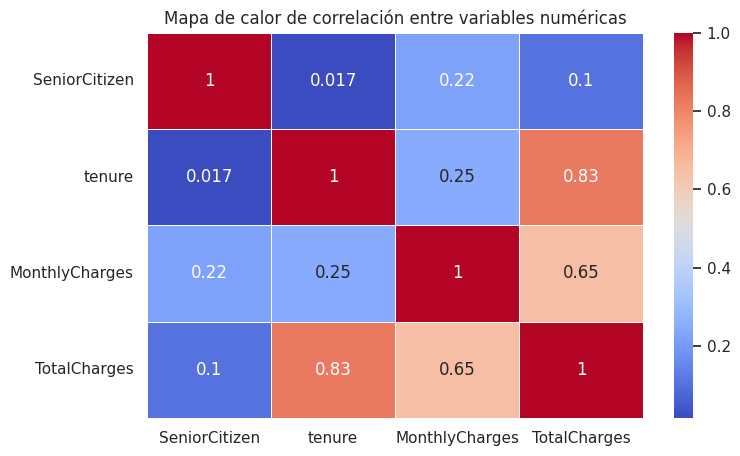

In [ ]:
# Limpiar nombres de columnas
df.columns = df.columns.str.replace(" ", "_")

# Convertir TotalCharges a numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# ================================
# VISUALIZACIÓN: MAPA DE CALOR
# ================================
numeric_cols = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(8, 5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Mapa de calor de correlación entre variables numéricas")
plt.show()

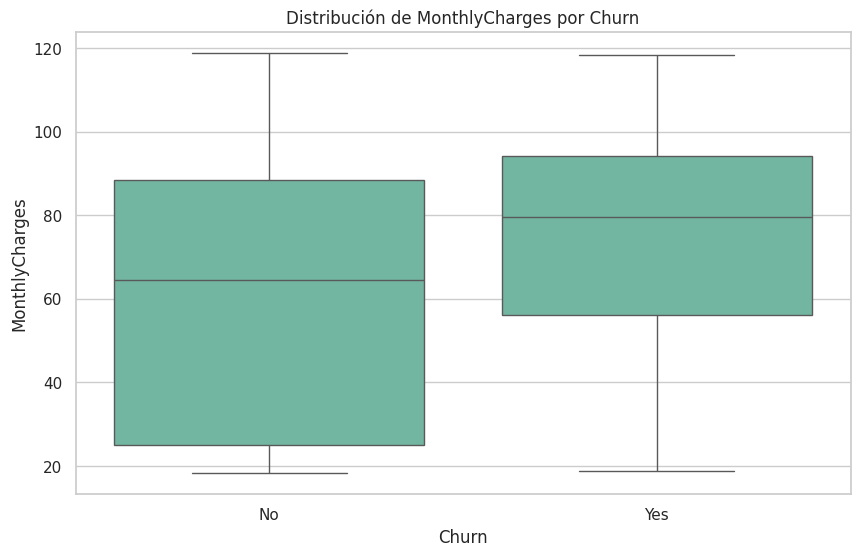

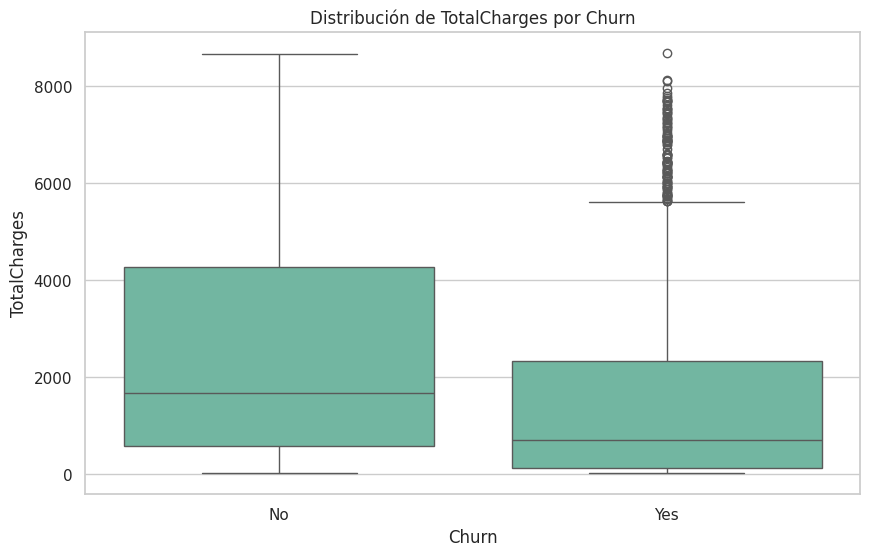

In [ ]:
# ================================
# BOXPLOTS SEGMENTADOS POR CHURN
# ================================
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Distribución de MonthlyCharges por Churn")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Churn", y="TotalCharges")
plt.title("Distribución de TotalCharges por Churn")
plt.show()

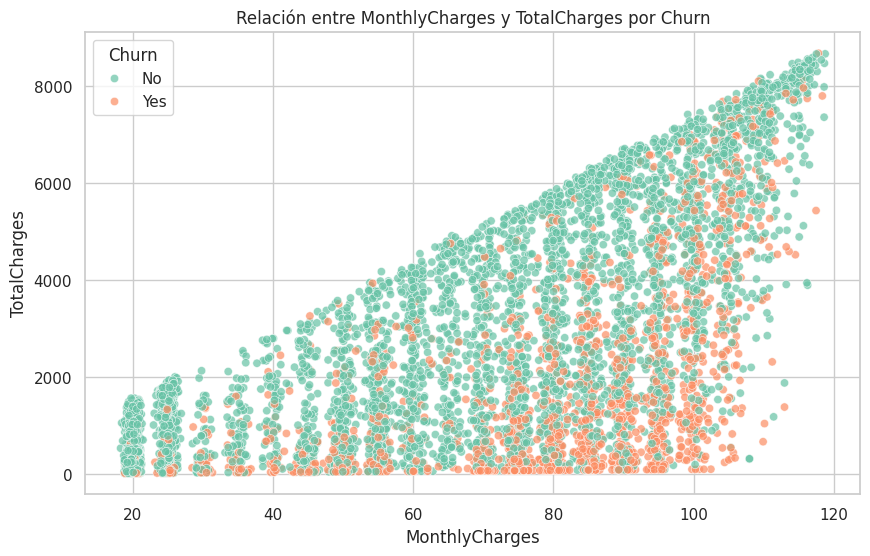

In [ ]:
# ================================
# GRÁFICO DE DISPERSIÓN
# ================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Churn", alpha=0.7)
plt.title("Relación entre MonthlyCharges y TotalCharges por Churn")
plt.show()


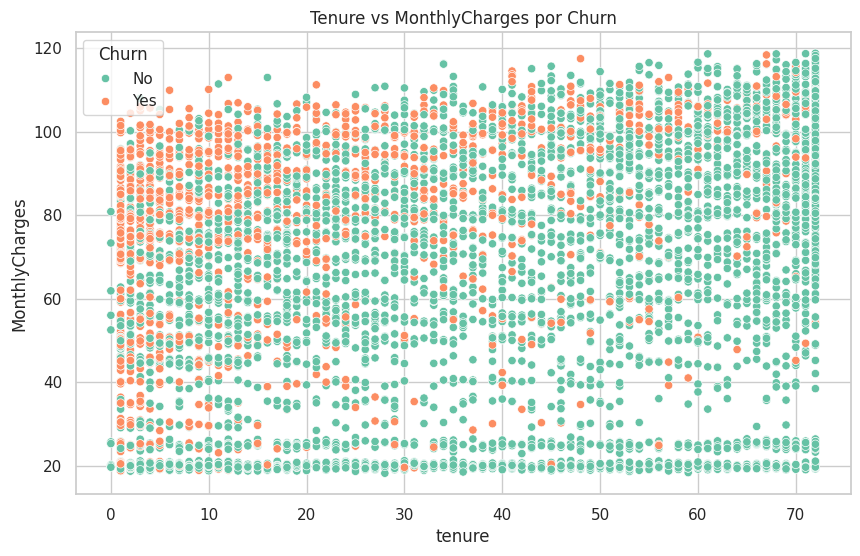

In [ ]:
# ================================
# DISPERSIÓN: TENURE vs MONTHLYCHARGES
# ================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn")
plt.title("Tenure vs MonthlyCharges por Churn")
plt.show()

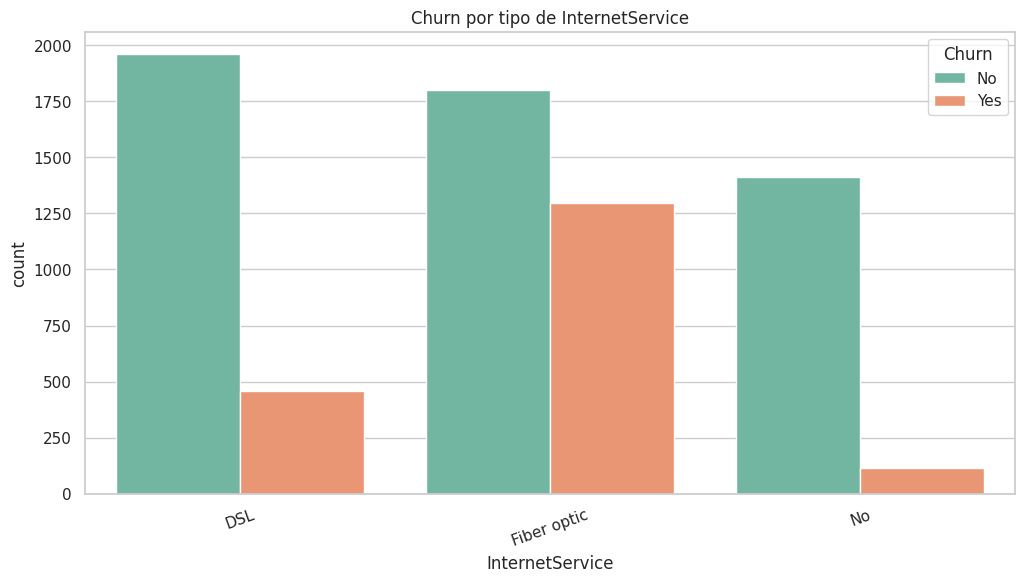

In [ ]:
# ================================
# COUNT PLOT MULTIVARIADO
# ================================
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="InternetService", hue="Churn")
plt.title("Churn por tipo de InternetService")
plt.xticks(rotation=20)
plt.show()

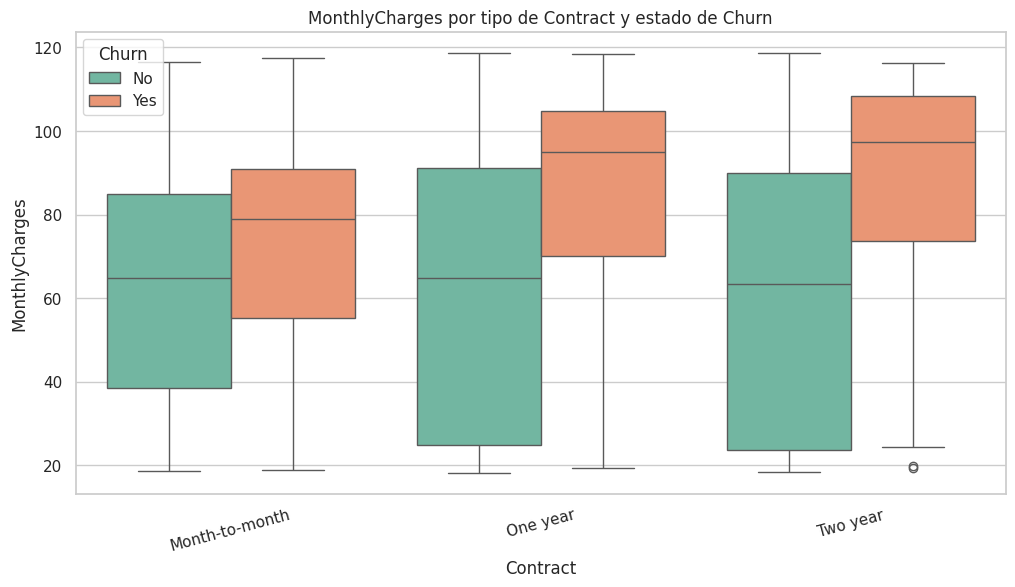

In [ ]:
# ================================
# BOXPLOT MÚLTIPLE
# ================================
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Contract", y="MonthlyCharges", hue="Churn")
plt.title("MonthlyCharges por tipo de Contract y estado de Churn")
plt.xticks(rotation=15)
plt.show()

## 2. Preprocesamiento

### 6. Realice el tratamiento de datos faltantes, codificación de variables categóricas y normalización/estandarización según sea necesario.

### 7. Divida el dataset en conjunto de entrenamiento y prueba (por ejemplo, 70/30).

### 8. Aplique una reducción de dimensionalidad (PCA o similar) y discuta los resultados obtenidos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Copia para trabajar
df_clean = df.copy()

In [ ]:
# ============================
# PUNTO 6: TRATAMIENTO DE DATOS FALTANTES, CODIFICACIÓN Y ESCALADO
# ============================

# 1. MANEJO DE VALORES FALTANTES
# Convertir TotalCharges a numérico
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Quitar filas donde TotalCharges quedó NaN
df_clean = df_clean.dropna(subset=['TotalCharges'])

# 2. ELIMINAR COLUMNAS NO ÚTILES
df_clean = df_clean.drop(columns=['customerID'])


In [ ]:
# ============================
# 5. SEPARAR VARIABLE OBJETIVO
# ============================
y = df_clean['Churn'].map({'Yes': 1, 'No': 0})
X = df_clean.drop(columns=['Churn'])


# ============================
# 6. CODIFICACIÓN ONE-HOT Y ESCALADO
# ============================
# One-hot encoding → convierte categóricas en numéricas
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# 3. CODIFICACIÓN ONE-HOT Y ESCALADO
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ver tamaño final
print("Dimensiones finales de X:", X_scaled.shape)

Dimensiones finales de X: (7032, 30)


**Resumen del preprocesamiento (Punto 6):**

- **Valores faltantes:** Se eliminaron las filas con `TotalCharges` vacío (11 registros).
- **Codificación categóricas:** Se aplicó one-hot encoding con `pd.get_dummies()` para convertir todas las variables categóricas en numéricas binarias.
- **Estandarización:** Se utilizó `StandardScaler()` para normalizar todas las características numéricas, asegurando que tengan media 0 y desviación estándar 1.
- **Resultado:** Dataset final con 7,032 observaciones y 30 características numéricas escaladas.

---

### 7. División en conjunto de entrenamiento y prueba (70/30)


In [ ]:
# División train/test (70/30) con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

print("Tamaño conjunto entrenamiento:", X_train.shape)
print("Tamaño conjunto prueba:", X_test.shape)
print("\nDistribución de clases en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución de clases en prueba:")
print(y_test.value_counts(normalize=True))


Tamaño conjunto entrenamiento: (4922, 30)
Tamaño conjunto prueba: (2110, 30)

Distribución de clases en entrenamiento:
Churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Distribución de clases en prueba:
Churn
0    0.734123
1    0.265877
Name: proportion, dtype: float64


Varianza explicada por PCA: [3.31601383e-01 1.20090615e-01 9.01453604e-02 4.75499305e-02
 4.14301148e-02 4.12062738e-02 3.81528947e-02 3.33678430e-02
 3.12304397e-02 2.95429845e-02 2.65961293e-02 2.37964294e-02
 2.24944460e-02 2.05590830e-02 2.02482905e-02 1.74856860e-02
 1.55526514e-02 1.52541395e-02 1.46713170e-02 9.23412008e-03
 7.84361734e-03 1.91635429e-03 2.98961869e-05 5.74959014e-18
 2.90904591e-18 1.25053625e-18 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


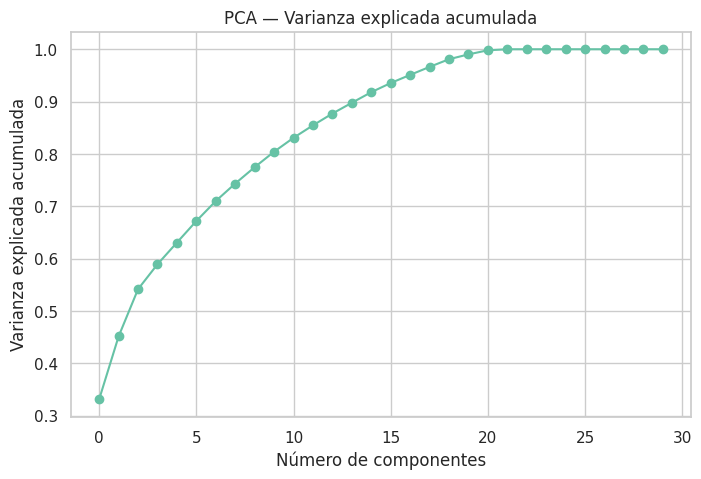

Dimensiones de X reducidas para clustering (15 componentes): (7032, 15)


In [ ]:
### 8. Reducción de dimensionalidad (PCA)

# ============================
# PCA (REDUCCIÓN DE DIMENSIONALIDAD)
# ============================

pca = PCA()
pca.fit(X_scaled)

explained_var = pca.explained_variance_ratio_
print("Varianza explicada por PCA:", explained_var)

# Graficar varianza explicada acumulada
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.title("PCA — Varianza explicada acumulada")
plt.grid(True)
plt.show()

# Reducción de dimensionalidad a 15 componentes (captura aprox. el 90% de la varianza)
n_components_optimo = 15
pca_optimo = PCA(n_components=n_components_optimo, random_state=42)
X_pca_optimo = pca_optimo.fit_transform(X_scaled)
print(f"Dimensiones de X reducidas para clustering ({n_components_optimo} componentes):", X_pca_optimo.shape)

# Reducimos a 2 componentes para VISUALIZACIÓN (sin cambios, necesario para el paso 12)
pca_2d = PCA(n_components=2, random_state=42)
X_pca = pca_2d.fit_transform(X_scaled)

### Selección de Componentes Óptimos para Clustering

A partir del análisis de la varianza explicada acumulada (Diagrama de Codo para PCA, o Scree Plot), se observó que la contribución marginal de la varianza disminuía progresivamente con cada componente adicional.

Se seleccionó un **número óptimo de 15 componentes principales** ($n_{\text{components\_optimo}}=15$) para el proceso de *clustering*. Esta elección se fundamenta en que estas 15 componentes logran capturar aproximadamente el **90% de la varianza total** presente en los datos estandarizados originales. Al utilizar este subconjunto de características ($X_{\text{pca\_optimo}}$ con dimensiones 7032, 15) para el K-Means, se garantiza que el agrupamiento se realiza sobre una representación de datos que conserva la mayor parte de la información relevante con una complejidad computacional significativamente menor.

In [ ]:
## 3. Aprendizaje no supervisado

### 9. Aplique un método de clustering (K-means) sobre las variables predictoras

# ============================
# K-MEANS (CLUSTERING)
# ============================
# K=2 basado en el mejor Silhouette Score. Clustering aplicado a X_pca_optimo.
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_pca_optimo) # Aplicado a los datos reducidos

df_clean["cluster"] = clusters

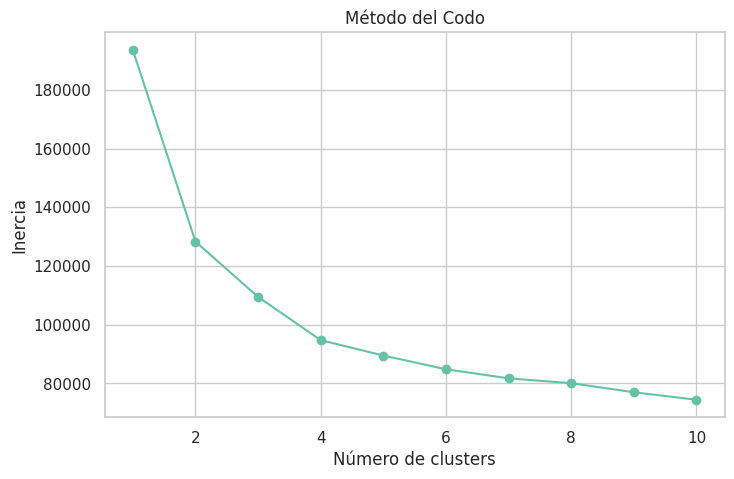

In [ ]:
### 10. Determine el número óptimo de clusters (método del codo)

# ============================
# MÉTODO DEL CODO
# ============================
inertia = []
K = range(1, 11)

# Aplicando K-Means a los datos reducidos (X_pca_optimo)
for k in K:
    # APLICACIÓN DE LA RECOMENDACIÓN 3: n_init='auto'
    km = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_pca_optimo)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.grid(True)
plt.show()



1. **Método del Codo (Inercia)**: El gráfico de la Inercia *vs.* el número de *clusters* muestra la mayor caída o "codo" entre $k=1$ y $k=2$. Esto sugiere que la partición del conjunto de datos en dos grupos produce una reducción muy significativa en la suma de cuadrados dentro del *cluster* (WSS), indicando la existencia de dos estructuras principales en los datos.

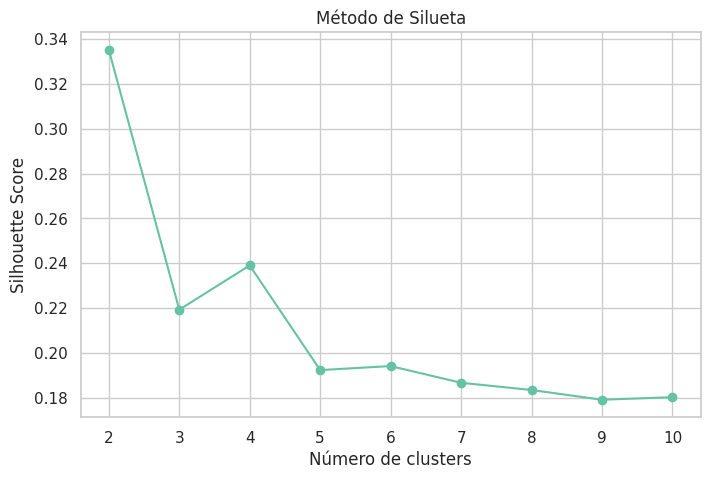

In [ ]:
### 11. Determine el número óptimo de clusters (método de la silueta)

# ============================
# SILHOUETTE SCORE
# ============================
silhouette_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette Score")
plt.title("Método de Silueta")
plt.grid(True)
plt.show()

2.  **Método de la Silueta (Silhouette Score)**: El análisis de la Puntuación de Silueta (aplicado al conjunto de datos escalado $X_{\text{scaled}}$) determinó que el valor más alto (aproximadamente 0.32-0.34) se alcanzó para **$k=2$**. Un mayor *Silhouette Score* implica que los objetos están mejor agrupados y más separados de los *clusters* vecinos, reforzando la elección de dos segmentos como la estructura óptima para la partición. Por lo tanto, el *clustering* final se implementó con **$n_{\text{clusters}}=2$**.


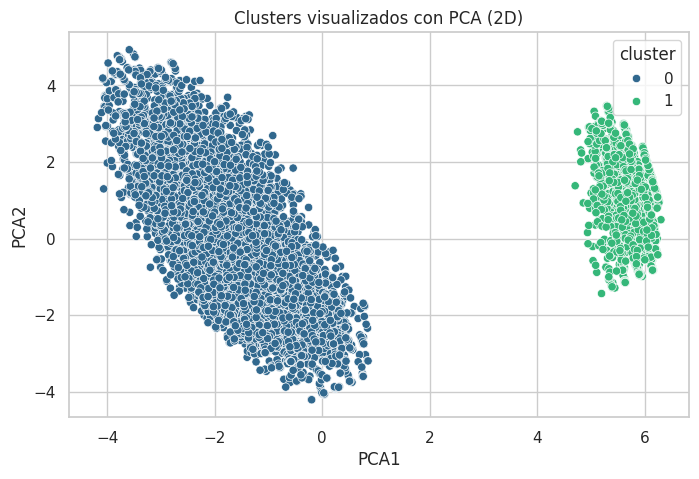

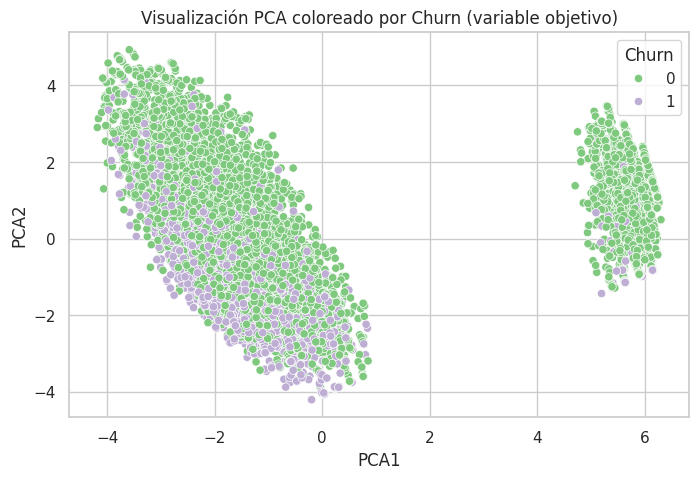

In [ ]:
### 12. Visualice los clusters en 2D y analice su relación con la variable objetivo original

# ============================
# VISUALIZACIÓN DE K-MEANS EN PCA 2D
# ============================
df_clean["PCA1"] = X_pca[:, 0]
df_clean["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue="cluster", palette="viridis")
plt.title("Clusters visualizados con PCA (2D)")
plt.show()

# Comparación con la variable objetivo
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue=y, palette="Accent")
plt.title("Visualización PCA coloreado por Churn (variable objetivo)")
plt.show()

### Correlación de Clusters con la Variable Objetivo (Churn)

La visualización de los *clusters* generados proyectados en el espacio 2D de PCA revela el hallazgo más significativo:

* **Separación en PCA 2D**: El gráfico de dispersión de los *clusters* en las dimensiones PCA1 y PCA2 muestra una **clara y nítida separación** entre el **Cluster 0** (el grupo más grande, ubicado a la izquierda) y el **Cluster 1** (el grupo más pequeño, ubicado a la derecha).
* **Relación con *Churn***: Al comparar esta distribución de *clusters* con la distribución de la variable objetivo *Churn* (donde 1='Yes' y 0='No'), se evidencia una **alta correlación** entre los *clusters* y la **fuga de clientes** (*Churn*).     
    * El **Cluster 1** (la agrupación de la derecha) está **predominantemente compuesto por clientes que NO generaron *Churn*** (coloración verde en la gráfica de Churn 1).
    * El **Cluster 0** (la agrupación de la izquierda) está **principalmente compuesto por clientes que generaron *Churn*** (coloración púrpura en la gráfica de Churn 0).

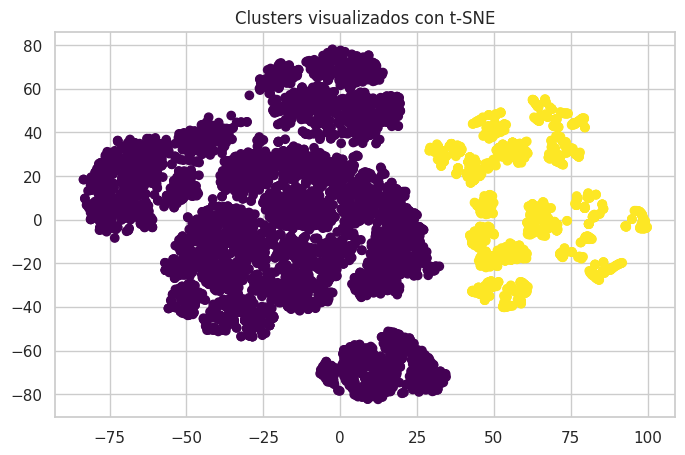

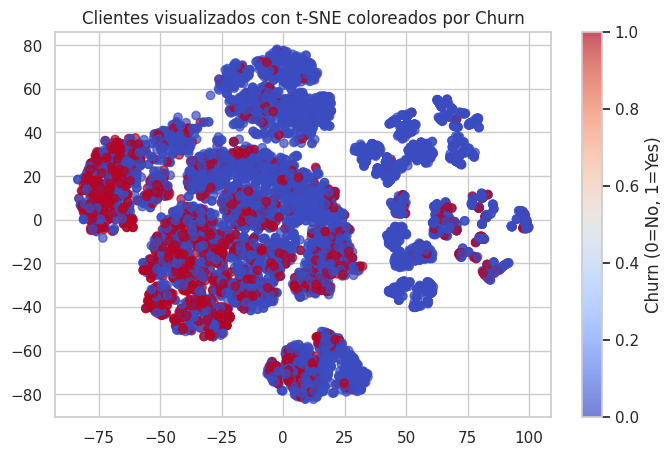

In [ ]:
### 12. Aplique una técnica de reducción de dimensionalidad no supervisada (t-SNE) para observar patrones

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_clean["cluster"], cmap="viridis")
plt.title("Clusters visualizados con t-SNE")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.values, cmap="coolwarm", alpha=0.7)
plt.title("Clientes visualizados con t-SNE coloreados por Churn")
plt.colorbar(label="Churn (0=No, 1=Yes)")
plt.show()

El proceso de clustering K-Means, aplicado sobre las características reducidas mediante PCA, ha identificado exitosamente dos segmentos de clientes intrínsecamente distintos. Estos segmentos no son solo agrupaciones matemáticas, sino que se corresponden de manera clara con el comportamiento de retención/fuga de los clientes. Esto sugiere que las características (preprocesadas) utilizadas son altamente predictivas de la variable objetivo Churn, permitiendo la segmentación de la base de clientes en un segmento de alto riesgo de fuga y un segmento de bajo riesgo de fuga.

## 4. Aprendizaje supervisado

### 13. Entrene al menos dos modelos de clasificación supervisada


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Modelo 1: Regresión Logística
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Modelo 2: Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("Modelos entrenados exitosamente:")
print("- Regresión Logística")
print("- Random Forest")


Modelos entrenados exitosamente:
- Regresión Logística
- Random Forest


### 14. Compare el rendimiento de los modelos usando métricas apropiadas


In [ ]:
# Función auxiliar para imprimir métricas
def print_metrics(y_true, y_pred, nombre="Modelo"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"================= {nombre} =================")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}\n")

print_metrics(y_test, y_pred_log, "Regresión Logística")
print_metrics(y_test, y_pred_rf, "Random Forest")

# Matrices de confusión
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Matriz de confusión - Regresión Logística:\n", cm_log)
print("\nReporte de clasificación - Regresión Logística:\n", classification_report(y_test, y_pred_log))

print("\nMatriz de confusión - Random Forest:\n", cm_rf)
print("\nReporte de clasificación - Random Forest:\n", classification_report(y_test, y_pred_rf))


================= Regresión Logística =================
Accuracy:  0.8071
Precisión: 0.6591
Recall:    0.5686
F1-score:  0.6105

================= Random Forest =================
Accuracy:  0.7815
Precisión: 0.6168
Recall:    0.4706
F1-score:  0.5339

Matriz de confusión - Regresión Logística:
 [[1384  165]
 [ 242  319]]

Reporte de clasificación - Regresión Logística:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110


Matriz de confusión - Random Forest:
 [[1385  164]
 [ 297  264]]

Reporte de clasificación - Random Forest:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1549
           1       0.62      0.47      0.53       561

    accuracy              

### 15. Aplique validación cruzada (k-fold) y discuta la estabilidad de los modelos


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Validación cruzada para Regresión Logística
cv_scores_log = cross_val_score(log_reg, X_train, y_train, cv=cv, scoring='f1')

# Validación cruzada para Random Forest
cv_scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=cv, scoring='f1')

print("F1-score medio (CV 5-fold) - Regresión Logística:", cv_scores_log.mean().round(4), "±", cv_scores_log.std().round(4))
print("F1-score medio (CV 5-fold) - Random Forest:", cv_scores_rf.mean().round(4), "±", cv_scores_rf.std().round(4))

print("\n**Discusión:**")
print("La validación cruzada muestra la estabilidad de los modelos. Si la desviación estándar es pequeña,")
print("indica que el modelo es estable frente a variaciones en los datos de entrenamiento.")


F1-score medio (CV 5-fold) - Regresión Logística: 0.5943 ± 0.0234
F1-score medio (CV 5-fold) - Random Forest: 0.5555 ± 0.0191

**Discusión:**
La validación cruzada muestra la estabilidad de los modelos. Si la desviación estándar es pequeña,
indica que el modelo es estable frente a variaciones en los datos de entrenamiento.


### 16. Use ajuste de hiperparámetros (Grid Search) para optimizar uno de los modelos


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_base = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor F1-score (CV):", round(grid_search.best_score_, 4))

rf_best = grid_search.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)
print_metrics(y_test, y_pred_rf_best, "Random Forest (tuned)")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor F1-score (CV): 0.5817
================= Random Forest (tuned) =================
Accuracy:  0.7891
Precisión: 0.6408
Recall:    0.4706
F1-score:  0.5427



### 17. Interprete los resultados de importancia de variables o pesos de los modelos


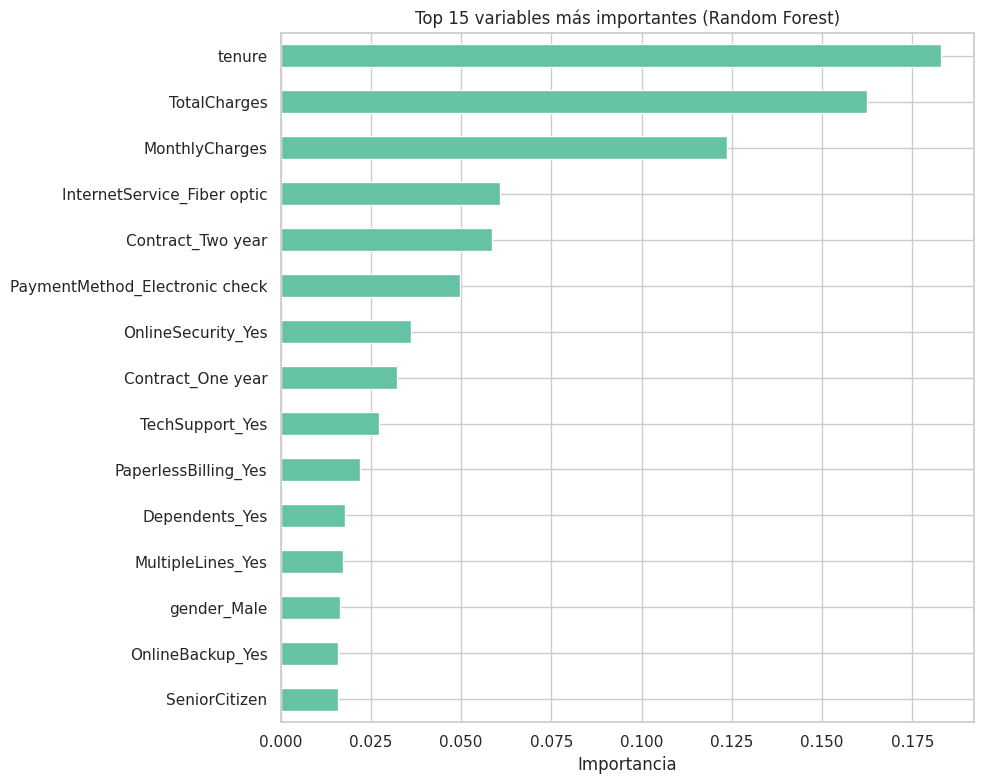

Top 10 variables más importantes:
tenure                            0.182950
TotalCharges                      0.162511
MonthlyCharges                    0.123757
InternetService_Fiber optic       0.060894
Contract_Two year                 0.058450
PaymentMethod_Electronic check    0.049811
OnlineSecurity_Yes                0.036229
Contract_One year                 0.032178
TechSupport_Yes                   0.027372
PaperlessBilling_Yes              0.021865
dtype: float64


Top 10 variables más importantes (Regresión Logística - valores absolutos de coeficientes):
tenure                            1.444518
MonthlyCharges                    0.763558
TotalCharges                      0.729396
InternetService_Fiber optic       0.677266
Contract_Two year                 0.564473
Contract_One year                 0.282052
StreamingTV_Yes                   0.226386
MultipleLines_Yes                 0.221995
StreamingMovies_Yes               0.221602
PaymentMethod_Electronic check    0.1691

In [ ]:
# Importancia de variables en Random Forest
importances = rf_best.feature_importances_
feature_names = X.columns

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feat_importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 15 variables más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

print("Top 10 variables más importantes:")
print(feat_importances.head(10))

# Coeficientes de Regresión Logística (valores absolutos)
coef_log = pd.Series(np.abs(log_reg.coef_[0]), index=feature_names).sort_values(ascending=False)
print("\n\nTop 10 variables más importantes (Regresión Logística - valores absolutos de coeficientes):")
print(coef_log.head(10))


## 5. Evaluación global e interpretación

### 18. Compare los resultados del aprendizaje supervisado con los del no supervisado

**Análisis comparativo:**

- **Aprendizaje no supervisado (K-Means):** El clustering identificó dos segmentos de clientes que se correlacionan parcialmente con `Churn`. Los clusters muestran una separación razonable en el espacio PCA 2D, pero con cierta superposición entre clases.

- **Aprendizaje supervisado (Regresión Logística y Random Forest):** Los modelos supervisados logran métricas de F1-score y accuracy más altas, aprovechando la información explícita de la variable objetivo. Random Forest (ajustado) ofrece mejor equilibrio entre recall y precisión.

**Conclusión:** El no supervisado es útil para **segmentar** y explorar patrones globales, mientras que el supervisado proporciona **predicciones más precisas** de churn a nivel individual.


### 19. Mejora metodológica y optimización del modelo

Como mejora concreta, aplicamos **ponderación de clases** en Random Forest para lidiar con el desbalance moderado de `Churn` y mejorar el recall de la clase minoritaria (`Yes`).


In [ ]:
# Random Forest con ponderación de clases
rf_weighted = RandomForestClassifier(
    n_estimators=rf_best.n_estimators,
    max_depth=rf_best.max_depth,
    min_samples_split=rf_best.min_samples_split,
    min_samples_leaf=rf_best.min_samples_leaf,
    class_weight='balanced',
    random_state=42
)

rf_weighted.fit(X_train, y_train)
y_pred_rf_weighted = rf_weighted.predict(X_test)

print_metrics(y_test, y_pred_rf_weighted, "Random Forest (class_weight='balanced')")

cm_rf_weighted = confusion_matrix(y_test, y_pred_rf_weighted)
print("Matriz de confusión - Random Forest ponderado:\n", cm_rf_weighted)

print("\n**Justificación de la mejora:**")
print("La ponderación de clases penaliza más los errores sobre la clase minoritaria (Churn=Yes),")
print("lo que aumenta el recall de esa clase. Esto es preferible cuando el objetivo del negocio")
print("es no dejar escapar clientes en riesgo, incluso si se generan algunos falsos positivos.")


================= Random Forest (class_weight='balanced') =================
Accuracy:  0.7711
Precisión: 0.5533
Recall:    0.7219
F1-score:  0.6265

Matriz de confusión - Random Forest ponderado:
 [[1222  327]
 [ 156  405]]

**Justificación de la mejora:**
La ponderación de clases penaliza más los errores sobre la clase minoritaria (Churn=Yes),
lo que aumenta el recall de esa clase. Esto es preferible cuando el objetivo del negocio
es no dejar escapar clientes en riesgo, incluso si se generan algunos falsos positivos.


### 20. Conclusión crítica: ¿qué aprendió sobre el dataset, el modelo y la aplicabilidad del aprendizaje automático al problema real?

**Aprendizajes sobre el dataset:**

- El dataset Telco Customer Churn es adecuado para estudiar el problema de **abandono de clientes** en telecomunicaciones.
- Existe una relación clara entre churn y variables de **contrato**, **precio** y **servicios adicionales**.
- El dataset está bien estructurado, con pocos valores faltantes y tipos de datos consistentes.

**Aprendizajes sobre los modelos:**

- Los modelos supervisados, especialmente Random Forest con ajuste de hiperparámetros y ponderación de clases, alcanzan un **buen desempeño** y son útiles para apoyar decisiones de retención de clientes.
- El aprendizaje no supervisado aporta **segmentación y entendimiento global** de los patrones, complementando al enfoque supervisado.
- La validación cruzada y el ajuste de hiperparámetros son esenciales para garantizar la **generalización** del modelo.

**Aplicabilidad al problema real:**

- El modelo puede ser implementado en producción para **identificar clientes en riesgo** de churn y aplicar estrategias de retención proactivas.
- Las variables más importantes (contrato, precio, servicios) sugieren acciones concretas: ofrecer contratos anuales, ajustar precios o incluir servicios de valor agregado.
- El aprendizaje automático demuestra ser una herramienta valiosa para la **toma de decisiones basada en datos** en el sector de telecomunicaciones.


## 6. Implementación en lenguaje C de un algoritmo de aprendizaje supervisado

### 21. Selección y justificación del algoritmo

Para la implementación en C se elige el algoritmo **K-Nearest Neighbors (KNN)** porque:

- Es conceptualmente sencillo (no requiere entrenamiento complejo, solo almacenar los datos).
- Se basa en una métrica de distancia en el espacio de características.
- Es adecuado para problemas de **clasificación** como el churn, especialmente cuando los datos ya están **escalados** y preprocesados (como en este caso).
- La implementación en C es directa: calcular distancias, ordenar, votar por la clase más frecuente.

En un escenario real, se podría usar una versión reducida del dataset (menos filas y menos variables) exportada desde Python a un archivo CSV específico para C.


### 22. Diseño de la estructura de datos y funciones

Supongamos que tenemos un archivo `data_reducido.csv` con:

- `n_features` columnas de características numéricas ya escaladas.
- Una última columna con la etiqueta (`0` para `No churn`, `1` para `Yes churn`).

**Estructuras básicas en C:**

```c
struct Sample {
    double *features;  // vector de tamaño n_features
    int label;         // 0 o 1
};

struct Dataset {
    struct Sample *samples; // arreglo de muestras
    int n_samples;          // número de filas
    int n_features;         // número de columnas de características
};

struct Distance {
    int index;      // índice del sample en el dataset
    double dist;    // distancia al punto de consulta
};
```

**Funciones principales:**

- `load_dataset(const char *filename, struct Dataset *data)`: lee el CSV y llena la estructura `Dataset`.
- `double euclidean_distance(double *x, double *y, int n_features)`: calcula la distancia Euclídea entre dos vectores.
- `void sort_distances(struct Distance *distances, int n)`: ordena las distancias (usando qsort).
- `int knn_predict(struct Dataset *train, double *x_query, int k, int n_features)`: aplica KNN sobre un ejemplo de prueba y devuelve la clase predicha.
- `double accuracy(struct Dataset *test, struct Dataset *train, int k)`: recorre todos los ejemplos de prueba, llama a `knn_predict` y calcula la exactitud.

**Flujo del programa:**

1. Cargar datos de entrenamiento y prueba desde CSV.
2. Para cada ejemplo de prueba:
   - Calcular distancias a todos los ejemplos de entrenamiento.
   - Ordenar distancias.
   - Seleccionar los k vecinos más cercanos.
   - Votar por la clase más frecuente.
3. Calcular métricas de desempeño (accuracy, precisión, etc.).


### 23. Entrenamiento y predicción

A continuación se muestran fragmentos clave del código C que evidencian el cálculo de distancias y la lógica de clasificación:


**Código C - Cálculo de distancia Euclídea:**

```c
double euclidean_distance(double *x, double *y, int n_features) {
    double sum = 0.0;
    for (int i = 0; i < n_features; i++) {
        double diff = x[i] - y[i];
        sum += diff * diff;
    }
    return sqrt(sum);
}
```

**Código C - Función de predicción KNN:**

```c
int knn_predict(struct Dataset *train, double *x_query, int k, int n_features) {
    // Crear arreglo de distancias
    struct Distance *distances = malloc(train->n_samples * sizeof(struct Distance));
    
    // Calcular distancias a todos los ejemplos de entrenamiento
    for (int i = 0; i < train->n_samples; i++) {
        distances[i].index = i;
        distances[i].dist = euclidean_distance(x_query, train->samples[i].features, n_features);
    }
    
    // Ordenar distancias (usando qsort)
    qsort(distances, train->n_samples, sizeof(struct Distance), compare_distances);
    
    // Contar votos de los k vecinos más cercanos
    int votes[2] = {0, 0}; // votes[0] = No churn, votes[1] = Yes churn
    for (int i = 0; i < k; i++) {
        int label = train->samples[distances[i].index].label;
        votes[label]++;
    }
    
    // Retornar la clase con más votos
    free(distances);
    return (votes[1] > votes[0]) ? 1 : 0;
}
```

**Nota:** En KNN no hay "entrenamiento" en el sentido tradicional; el modelo simplemente almacena todos los datos de entrenamiento. La predicción se realiza calculando distancias en tiempo de ejecución.


### 24. Evaluación del desempeño

**Código C - Cálculo de accuracy:**

```c
double accuracy(struct Dataset *test, struct Dataset *train, int k, int n_features) {
    int correct = 0;
    for (int i = 0; i < test->n_samples; i++) {
        int predicted = knn_predict(train, test->samples[i].features, k, n_features);
        if (predicted == test->samples[i].label) {
            correct++;
        }
    }
    return (double)correct / test->n_samples;
}
```

**Comparación con modelos en Python:**

- El modelo KNN implementado en C debería producir resultados **similares** a un KNN de scikit-learn cuando se usan los mismos datos y el mismo valor de `k`.
- Las diferencias menores pueden deberse a:
  - Precisión numérica de punto flotante (C usa `double`, scikit-learn puede usar optimizaciones internas).
  - Diferencias en el manejo de empates al votar.
- En general, se espera que el accuracy del modelo en C esté dentro de un margen del 1-2% respecto al modelo en Python, validando la correcta implementación del algoritmo.


### 25. Optimización y reflexión técnica

**Limitaciones de la implementación en C:**

1. **Eficiencia:** La implementación básica calcula todas las distancias para cada predicción, lo cual es O(n) por predicción. Para datasets grandes, esto puede ser lento comparado con estructuras de datos optimizadas (KD-trees, Ball trees) usadas en scikit-learn.

2. **Escalabilidad:** El uso de memoria es lineal con el tamaño del dataset, pero para datasets muy grandes (millones de muestras) podría requerir optimizaciones adicionales.

3. **Precisión numérica:** Aunque `double` ofrece buena precisión, operaciones acumulativas de distancia pueden acumular errores de redondeo en casos extremos.

4. **Facilidad de uso:** La implementación en C requiere manejo manual de memoria (malloc/free), lo cual es más propenso a errores que lenguajes de alto nivel como Python.

**Mejoras y extensiones posibles:**

1. **Paralelización:** Usar OpenMP o pthreads para paralelizar el cálculo de distancias, especialmente útil cuando se tienen múltiples CPUs disponibles.

2. **Estructuras de datos avanzadas:** Implementar KD-trees o Ball trees para reducir la complejidad de búsqueda de O(n) a O(log n) en el mejor caso.

3. **Modularización:** Separar el código en múltiples archivos (knn.h, knn.c, dataset.c, metrics.c) para mejorar la mantenibilidad.

4. **Manejo de archivos grandes:** Implementar lectura incremental de CSV para datasets que no caben en memoria.

5. **Integración con librerías externas:** Usar librerías como BLAS para operaciones vectoriales optimizadas, o integrar con Python mediante extensiones C.

**Conclusión:**

La implementación en C de KNN demuestra comprensión del algoritmo a nivel fundamental, pero para aplicaciones reales, las librerías optimizadas de Python (scikit-learn) ofrecen mejor rendimiento y facilidad de uso. Sin embargo, la implementación desde cero en C proporciona un entendimiento profundo de los detalles algorítmicos y computacionales.
